# Shuffled Frog Leaping Algorithm

- Using https://github.com/theDIG95/Shuffled-frog-leaping-algorithm as a base code
- Adapted in order to minimize boulders functions.

## Description

This is an optimization algorithm which can be used to optimize any given mathematical model or equation. It is derived from observing the movement of frogs while they search from a food source:

- Frogs are divided into groups(called memeplexes) and take advantage from the knowledge of other groups. 
- From each of the group the worst frog tries to improve its position inside the group which improves the overall group and ultimately the colony.

This algorithm can be used to optimize a n-dimensional boulders function. In order to plot the results, we will here show how to use it for 2-dimensional data. 

The fitness is the opposite of the boulders function (the lower the function is, the highest the fitness is). 

## Algorithm

### 1. Frog population sorting and division

- Randomly initialize n frogs to use (here using np.random.uniform()). 
- Then these frogs are divided into m number of memeplexes. 


The global population of frogs is sorted using the descending order of fitness, so that the top fitness frogs are in different memeplexes. For example if there are 2 memeplexes, then the highest fitness frog is in memeplex 1, the 2nd fittest frog is in memeplex 2, 3rd fittest frog is again in memeplex 1 and so on.

### 2. Local search for each memeplex

We perform a local search for all memeplexes individually for a number of iterations.

#### 1_ Inside each memeplexe, move the frog having the worst fitness towards the frog having the best one:
<br>
$$ frog_{worst} = frog_{worst} + (random * (frog_{best} - frog_{worst}))$$ 
 
 With $random$ a randomly selected number from $0$ to $1$  








#### 2_ If its fitness has not improved: Move the worst frog toward the greatest frog of the overall population:
<br>
$$ frog_{worst} = frog_{w} + (random * (frog_{greatest} - frog_{worst}))$$ 

With $random$ another randomly selected number from $0$ to $1$  



#### 3_ If its fitness has not improved: Set the frog to a new randomly selected position.
<br>


### 3. Shuffle the memeplexes
We shuffle the memeplexes after the local search so that some frogs are redistributed among other memplexes, in order to improve each one of them based on the knowledge of the others.


### 4. Termination

Different thresholds can be used as a terminating condition. Here, a maximum number of iteration is used. We could also use other criteria such as if the frog with the best fitness doesn't  significantly improve its fitness over a few loops.

## Application


On boulders functions.

To see how they are generated, check sfla.py

In [2]:
%matplotlib inline
from sfla import *
import numpy as np
import matplotlib.pyplot as plt

### 1 - Plot a boulder function

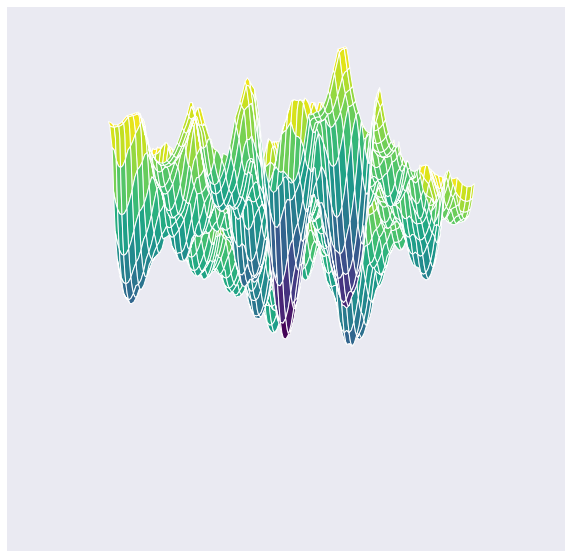

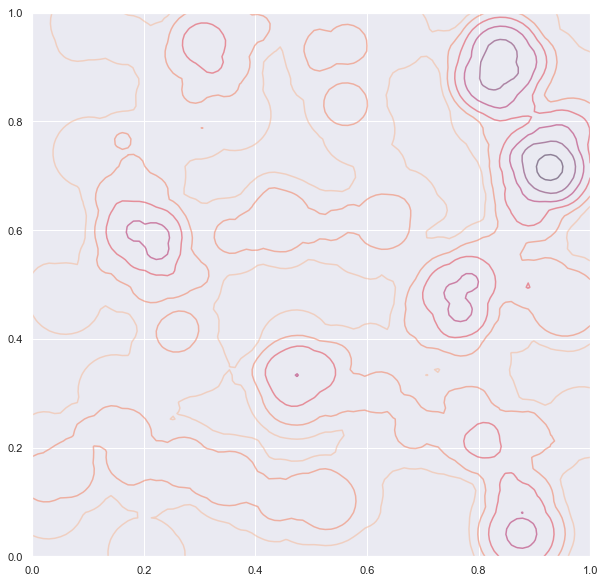

In [3]:
from mpl_toolkits.mplot3d import Axes3D
X, Y = np.meshgrid(np.linspace(0, 1, 100), np.linspace(0, 1, 100))
Z = np.zeros(X.shape)
for i in range(n_boulders):
    eval_ = (
        (X - boulders[i, 0]) ** 2
        + (Y - boulders[i, 1]) ** 2
        - boulders[i, 2] ** 2
    )
    Z[eval_ < 0] += eval_[eval_ < 0]
    
#3D plot
fig = plt.figure(figsize=(10,10))
ax = plt.axes(projection='3d')
ax.axis('off')
ax.view_init(-30, 30)
ax.plot_surface(X, Y, Z, cmap=plt.cm.viridis)

#2D plot
fig = plt.figure(figsize=(10, 10))
plt.contour(X, Y, Z, alpha=.5)

### 2 - An example
<br>

Using:
- 80 points,
- Dimension 2
- 8 memeplexes
- A single memeplex will be iterated 10 times before shuffling
- The memeplexes will be shuffled 150 times

In [4]:
solun, frogs, memeplexes = sfla(opt_func, 80, 2, 8, 10, 150)

Optimal Solution : [0.47670281 0.34532505]


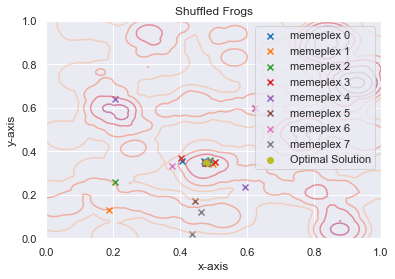

In [5]:
print("Optimal Solution : {}".format(solun))
for idx, memeplex in enumerate(memeplexes):
    plt.scatter(frogs[memeplex, 0], frogs[memeplex, 1], marker='x', label="memeplex {}".format(idx))
plt.scatter(solun[0], solun[1], marker='o', label="Optimal Solution")

plt.legend()
plt.xlabel("x-axis")
plt.ylabel("y-axis")
plt.title("Shuffled Frogs")
plt.contour(X, Y, Z, alpha=.5)
plt.show()

### 3 - Influence of the number of iterations:
<br>

Using:
- 160 points,
- Dimension 2
- 8 memeplexes
- A single memeplex will be iterated 10 times before shuffling
- The memeplexes will be shuffled 150 times

Optimal Solution for  0  iterations : [0.9084007  0.72987952]


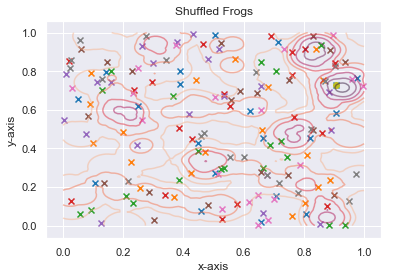

Optimal Solution for  20  iterations : [0.91699644 0.70113414]


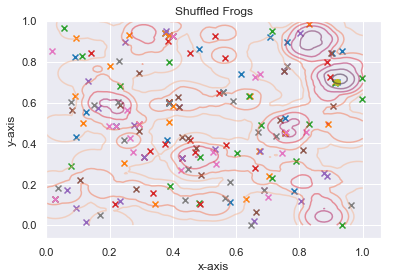

Optimal Solution for  40  iterations : [0.92423925 0.73037598]


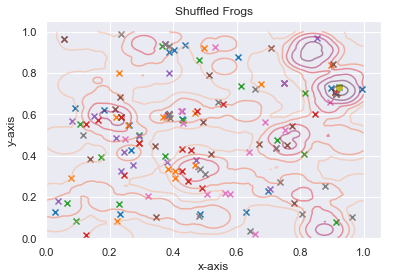

Optimal Solution for  60  iterations : [0.92406255 0.7303969 ]


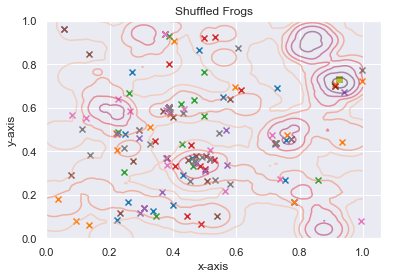

Optimal Solution for  80  iterations : [0.91101463 0.70738469]


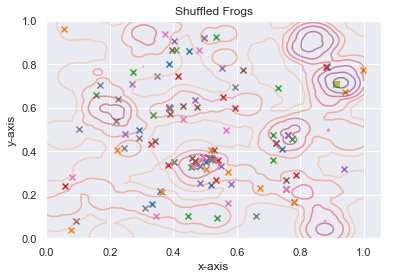

Optimal Solution for  100  iterations : [0.87367422 0.72464295]


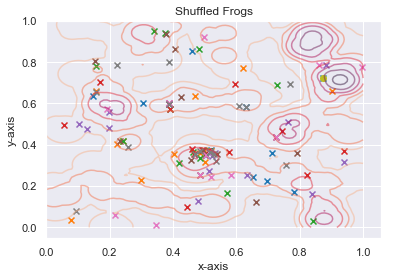

Optimal Solution for  120  iterations : [0.90102382 0.66263381]


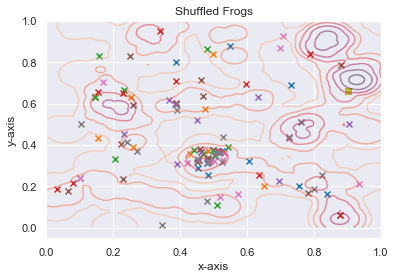

Optimal Solution for  140  iterations : [0.90064771 0.66271387]


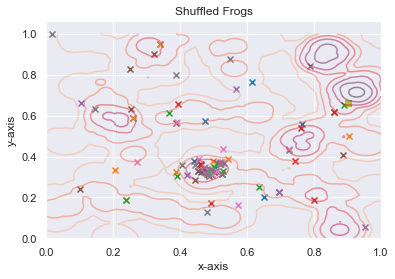

Optimal Solution for  149  iterations : [0.97166116 0.72149176]


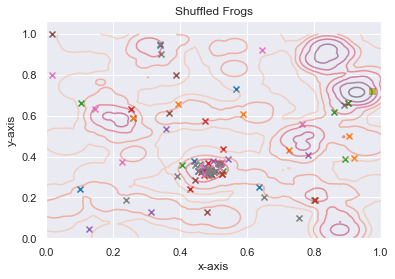

In [6]:
solun, frogs, memeplexes = sfla_iter(opt_func,X,Y,Z, 160, 2, 8, 10, 150)